#### Obravnava problema nihanja z 1 PS ($x(t)$) ob vzbujanju $y(t)$ in uporabo konvolucijskega integrala

In [2]:
#import numpy and matplotlib
import numpy as np;
import matplotlib.pyplot as plt;
#use plot style seaborn
plt.style.use('seaborn');
colors = np.array(['#390099', '#9e0059', '#ff0054', '#ff5400', '#ffbd00', '#80ff72', '#00d084', '#00a3af']);


C:\Users\marko\AppData\Local\Temp\ipykernel_4108\2329666743.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn');


##### Neodvisna spremenljivka $t$ in podatki - lastnosti sistema

In [42]:
t = np.linspace(0, 40, 4001)
t0 = t[800]
g = 9.81
m = 20;
d = 0.75;
k = 200;


In [43]:
t0_i = np.argmin(np.abs(t - t0))
d_krit = np.sqrt(k/m)
delta = d/d_krit

#### Definicija in izpis dušenja in $t0$

In [44]:
#create a table print of the values t0_i, t0, delta, d_krit, d
print(f't0 \t\t = {t0}')
print(f'indeks t0_i \t = {t0_i}')
#print d, d_krit, delta
print(f'delta \t\t = {delta:.3f}')
print(f'd_krit \t\t = {d_krit:.3f}')
print(f'd \t\t = {d:.3f}')

t0 		 = 8.0
indeks t0_i 	 = 800
delta 		 = 0.237
d_krit 		 = 3.162
d 		 = 0.750


#### Izračun $\omega_0$ in $\omega_{0d}$

In [45]:
omega0 = np.sqrt(k/m)
omega0D = omega0 * np.sqrt(1 - delta**2)

Definicija in izris funkcij $g1(t)$, $g2(t)$, $f(t)$ 

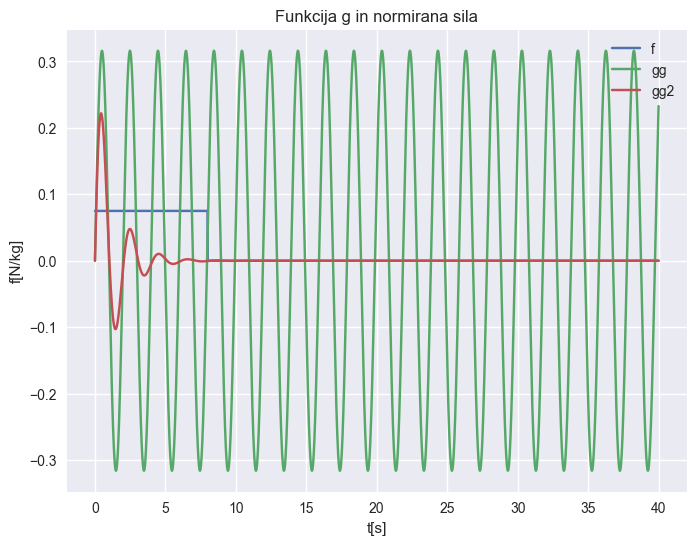

In [46]:
g1 = 1/omega0 * np.sin(omega0 * t)
g2 = 1/omega0 * np.exp(-delta * omega0 * t) * np.sin(omega0D * t)
F0 = 6
F = np.zeros_like(t)
#F[0:t0_i] = F0 * (1 - t[:t0_i]/t0)
#F = np.sin(2 * np.pi * t / 10)
F[0:t0_i] = F0/4
f = F/m


#plot f with size 8,6
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(t, f, label='f')
#new plot with gg and gg2
ax.plot(t, g1, label='gg')
ax.plot(t, g2, label='gg2')
#set x and y labels
ax.set_xlabel('t[s]')
ax.set_ylabel('f[N/kg]')
#set title
ax.set_title(f'Funkcija g in normirana sila')
#set legend
ax.legend()
#show plot
plt.show()

In [47]:
x = np.convolve(f, g1) * (t[1] - t[0])
xD = np.convolve(f, g2) * (t[1] - t[0])
x = x[:len(t)]
xD = xD[:len(t)]

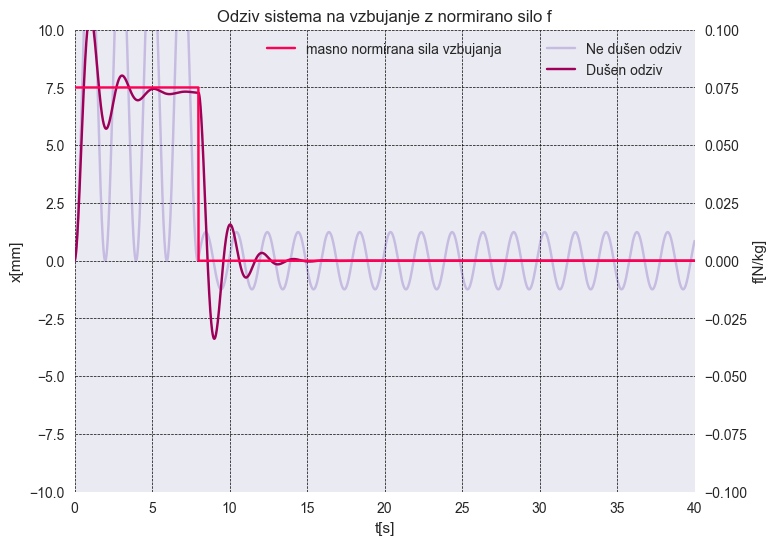

In [48]:
#plot x and xD and f with labels and legend and show the plot
fig, ax = plt.subplots(figsize=(8,6))
ax2 = ax.twinx()

ax.plot(t, 1000*x, label='Ne dušen odziv', color = colors[0], alpha = 0.2)
ax.plot(t, 1000*xD, label='Dušen odziv', color = colors[1])
ax2.plot(t, f, label='masno normirana sila vzbujanja', color = colors[2])
ax.set_xlabel('t[s]')
ax.set_ylabel('x[mm]')
ax2.set_ylabel('f[N/kg]')
#set axis limits
ax.set_xlim(0, 40)
ax.set_ylim(-10, 10)
ax2.set_ylim(-0.1, 0.1)
ax.set_title('Odziv sistema na vzbujanje z normirano silo f')
ax.legend()
ax2.grid(False)
ax.grid(color='black', linestyle='--', linewidth=0.5)
ax2.legend(loc='upper center')
plt.show()
